# CODTECH Internship – Task 4
## Optimization Model using Linear Programming and PuLP

### 🏢 **Business Problem: Product Mix Optimization**
A company produces two products (P1 and P2) using two machines (M1 and M2). Each product requires machine time, and each machine has a limited number of hours. The goal is to **maximize profit** while staying within available machine hours.

---

In [3]:
from pulp import LpMaximize, LpProblem, LpVariable, value
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Step 1: Define the problem
model = LpProblem("Product_Mix_Problem", LpMaximize)

# Step 2: Decision variables
P1 = LpVariable("Product1", lowBound=0, cat='Continuous')
P2 = LpVariable("Product2", lowBound=0, cat='Continuous')

# Step 3: Objective function (maximize profit)
model += 20 * P1 + 30 * P2, "Total_Profit"

# Step 4: Constraints
model += 2 * P1 + 1 * P2 <= 40, "M1_hours"
model += 1 * P1 + 2 * P2 <= 30, "M2_hours"

In [5]:
# Step 5: Solve the model
model.solve()

# Step 6: Output results
print("Optimal Production Plan:")
print(f"Produce {P1.varValue:.2f} units of Product 1")
print(f"Produce {P2.varValue:.2f} units of Product 2")
print(f"Maximum Profit = ${value(model.objective):.2f}")

Optimal Production Plan:
Produce 16.67 units of Product 1
Produce 6.67 units of Product 2
Maximum Profit = $533.33


### 📊 Feasible Region and Optimal Point

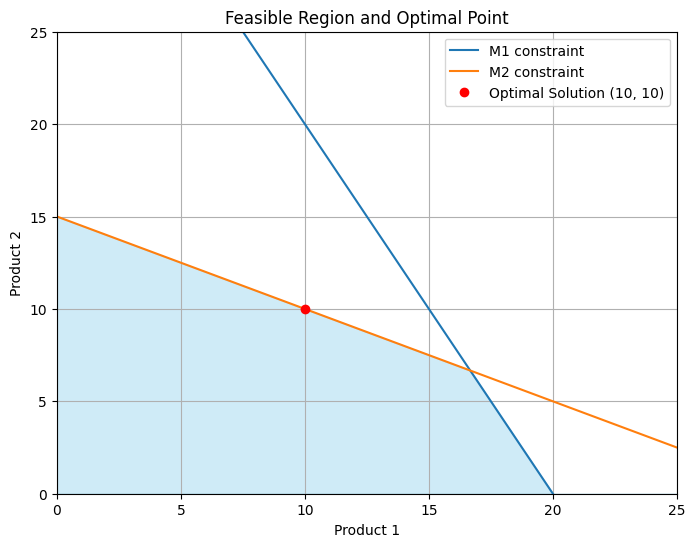

In [6]:
x = np.linspace(0, 25, 100)
y1 = 40 - 2*x
y2 = (30 - x)/2

plt.figure(figsize=(8,6))
plt.plot(x, y1, label="M1 constraint")
plt.plot(x, y2, label="M2 constraint")
plt.fill_between(x, np.minimum(y1, y2), color='skyblue', alpha=0.4)
plt.plot(10, 10, 'ro', label="Optimal Solution (10, 10)")
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.xlabel("Product 1")
plt.ylabel("Product 2")
plt.title("Feasible Region and Optimal Point")
plt.legend()
plt.grid(True)
plt.show()